In [213]:
# AISC2007 - Deep Learning - week 3 - Group D
# Group Members and Contribution:
# Yasha Khanna : 500225015 : Data Preprocessing along with Nabila , compilation of complete code and project management.
# Harpreet Singh : 500224333 :  built xgboost model and DNN models  with different variations 
# including different activation functions:( relu, leakyrelu, prelu and gelu).
# Ridham Dogra: 500223135 : Built DNN model and fine tuned the model to get better accuracy and plotted roc curve 
# Nabila Mansoor: 500223650 : data preprocessing along with yasha khanna.
# Parneet Kaur : 500223497 :  xgboost visualisation, hyperparameter tuning.
# Nishwinder : 500224025 : xg boost and DNN performance visualisation along Rutvik Trivedi.
# Rutvik Trivedi : 500223490 : xg boost and DNN performance visualisation along with Nshwinder.

In [69]:
# lets begin the journey by importing some initial libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [70]:
# importing data ......

data = pd.read_csv('c:/Users/dhill/bank_data_train.csv')
data.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [71]:
# ssome initial checks on data......

data.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
data.drop('ID', axis =1)
data.isna().sum()            # checking for na values.....

ID                               0
CR_PROD_CNT_IL                   0
AMOUNT_RUB_CLO_PRC           38323
PRC_ACCEPTS_A_EMAIL_LINK    200027
APP_REGISTR_RGN_CODE        294640
                             ...  
TURNOVER_DYNAMIC_CC_3M           0
LDEAL_ACT_DAYS_PCT_TR       261742
LDEAL_ACT_DAYS_PCT_TR4      261742
LDEAL_ACT_DAYS_PCT_CURR     261742
TARGET                           0
Length: 116, dtype: int64

In [73]:
data.shape    # finding rows and columns 

(355190, 116)

In [74]:

# Identifing numerical columns....
numerical_columns = data.select_dtypes(include=[np.number]).columns

#  Computing the mean of each numerical column.......
column_means = data[numerical_columns].mean()

# Count the number of NaN values in each numerical column......
na_counts = data[numerical_columns].isna().sum()
lr = .00001

# Adjust the mean by subtracting (lr * number of NaN values)....
adjusted_means = column_means - (lr * na_counts)

# Fill NaN values with the adjusted means only in numerical columns...
data[numerical_columns] = data[numerical_columns].fillna(adjusted_means)   # filling with 0 giving better results.

data.describe() 


,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.105225,0.002697,-1.126462,48.503377,-1.126462,-1.126462,0.001305,-1.760174,-1.762499,...,0.007309,-1.840484,-1.903088,-1.809814,-1.886306,0.004309,-1.914857,-1.914857,-1.914857,0.081435
std,128148.804566,0.431372,0.156935,0.992126,9.059646,0.992126,0.992126,0.029118,1.155884,1.157244,...,0.066681,1.156703,1.154012,1.153563,1.152268,0.059852,1.153560,1.153560,1.153560,0.273503
min,146841.000000,0.000000,-0.339185,-2.000270,0.000000,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
25%,257846.250000,0.000000,0.000000,-2.000270,48.001098,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
50%,368778.500000,0.000000,0.000000,-2.000270,48.001098,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
75%,479737.750000,0.000000,0.028539,0.000000,48.001098,0.000000,0.000000,0.000000,-2.363884,-2.366208,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.000000,89.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
data.isna().sum()   # checking na values now.....and its good to move forward.

ID                          0
CR_PROD_CNT_IL              0
AMOUNT_RUB_CLO_PRC          0
PRC_ACCEPTS_A_EMAIL_LINK    0
APP_REGISTR_RGN_CODE        0
                           ..
TURNOVER_DYNAMIC_CC_3M      0
LDEAL_ACT_DAYS_PCT_TR       0
LDEAL_ACT_DAYS_PCT_TR4      0
LDEAL_ACT_DAYS_PCT_CURR     0
TARGET                      0
Length: 116, dtype: int64

In [76]:
data.head() # looking at data ....oncce again

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
1,146842,0,0.041033,-2.00027,48.001098,-2.00027,-2.00027,0.0,0.166667,0.186107,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
2,146843,0,0.006915,0.00000,48.001098,0.00000,0.00000,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
3,146844,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
4,146845,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0


In [77]:
data.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.105225,0.002697,-1.126462,48.503377,-1.126462,-1.126462,0.001305,-1.760174,-1.762499,...,0.007309,-1.840484,-1.903088,-1.809814,-1.886306,0.004309,-1.914857,-1.914857,-1.914857,0.081435
std,128148.804566,0.431372,0.156935,0.992126,9.059646,0.992126,0.992126,0.029118,1.155884,1.157244,...,0.066681,1.156703,1.154012,1.153563,1.152268,0.059852,1.153560,1.153560,1.153560,0.273503
min,146841.000000,0.000000,-0.339185,-2.000270,0.000000,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
25%,257846.250000,0.000000,0.000000,-2.000270,48.001098,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
50%,368778.500000,0.000000,0.000000,-2.000270,48.001098,-2.000270,-2.000270,0.000000,-2.363884,-2.366208,...,0.000000,-2.539696,-2.591713,-2.520207,-2.585518,0.000000,-2.603482,-2.603482,-2.603482,0.000000
75%,479737.750000,0.000000,0.028539,0.000000,48.001098,0.000000,0.000000,0.000000,-2.363884,-2.366208,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.000000,89.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
data.duplicated()       # checking for duplicates and if there dropping it..
data.drop_duplicates()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
1,146842,0,0.041033,-2.00027,48.001098,-2.00027,-2.00027,0.0,0.166667,0.186107,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
2,146843,0,0.006915,0.00000,48.001098,0.00000,0.00000,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
3,146844,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
4,146845,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,590822,0,0.000000,0.00000,48.001098,0.00000,0.00000,0.0,0.142857,0.123579,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
355186,590823,0,0.000000,0.00000,48.001098,0.00000,0.00000,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
355187,590825,0,0.041298,-2.00027,48.001098,-2.00027,-2.00027,0.0,0.089286,0.065293,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0
355188,590826,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0.0,-2.539696,-2.591713,-2.520207,-2.585518,0.0,-2.603482,-2.603482,-2.603482,0


In [79]:
data_num = data.select_dtypes(['int64','float64']) # separating num col from df

In [80]:
data_num.shape  # checking only num data

(355190, 103)

In [81]:
data_num.shape  

(355190, 103)

In [82]:
non_numerical_columns = data.select_dtypes(exclude='number').columns    # now seprating non num data and analysising for further actions..
data_str = data[non_numerical_columns]
data_str.shape

(355190, 13)

In [83]:
data_str.head(10)  # lets see how non num data looks here.....

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,NaN,NaN,NaN,NaN,начальник отдела,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,NaN,NaN,NaN,NaN,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
3,NaN,NaN,NaN,NaN,МЕНЕДЖЕР ИАО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
6,NaN,NaN,NaN,NaN,Директор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
7,NaN,NaN,NaN,NaN,предприниматель,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01
8,NaN,NaN,NaN,NaN,Генеральный директор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01
9,NaN,NaN,NaN,NaN,АРХИТЕКТОР,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01


In [84]:
data_str.isna().sum()    # na values in non num data column.....

CLNT_TRUST_RELATION            285769
APP_MARITAL_STATUS             286956
APP_KIND_OF_PROP_HABITATION    295829
CLNT_JOB_POSITION_TYPE         310409
CLNT_JOB_POSITION              144379
APP_DRIVING_LICENSE            297933
APP_EDUCATION                  287086
APP_TRAVEL_PASS                297933
APP_CAR                        297934
APP_POSITION_TYPE              294645
APP_EMP_TYPE                   287828
APP_COMP_TYPE                  287828
PACK                                0
dtype: int64

In [85]:
# Iterating through each column and printing unique values.....
for column in data_str:
    unique_values = data_str[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'CLNT_TRUST_RELATION': [nan 'MOTHER' 'BROTHER' 'FRIEND' 'SISTER' 'OTHER' 'RELATIVE' 'DAUGHTER'
 'SON' 'FATHER' 'Близкий ро' 'Друг' 'Отец' 'Сестра' 'Сын' 'Мать' 'Муж'
 'Брат' 'мать' 'Дальний ро' 'Дочь' 'Жена']
Unique values in column 'APP_MARITAL_STATUS': [nan 'D' 'M' 'v' 'V' 'T' 'm' 'N' ' ' 'W' 't' 'd' 'C' 'w']
Unique values in column 'APP_KIND_OF_PROP_HABITATION': [nan 'SO' 'RENT' 'OTHER' 'JO' 'NPRIVAT']
Unique values in column 'CLNT_JOB_POSITION_TYPE': [nan 'SPECIALIST' 'SELF_EMPL' 'MANAGER' 'TOP_MANAGER']
Unique values in column 'CLNT_JOB_POSITION': ['начальник отдела' nan 'ГЕНЕРАЛЬНЫЙ ДИРЕКТОР' ...
 'Эксперт контакт Центра' 'ПРОХЛДЧИК' 'ХУДОЖНИК КОМПЬЮТЕРНОЙ ГРАФИКИ']
Unique values in column 'APP_DRIVING_LICENSE': [nan 'Y' 'N']
Unique values in column 'APP_EDUCATION': [nan 'S' 'HH' 'h' 'H' 'SS' 'UH' 'A' 's' 'i' 'US' 'e' 'I' 'HI' 'a' 'AV' 'E'
 'AC']
Unique values in column 'APP_TRAVEL_PASS': [nan 'N' 'Y']
Unique values in column 'APP_CAR': [nan 'N' 'Y']
Uniqu

In [86]:

# Creating a mapping dictionary for german words.
translation_dict = {
    'Близкий родственник': 'Close relative',
    'Друг': 'Friend',
    'Отец': 'Father',
    'Сестра': 'Sister',
    'Сын': 'Son',
    'Мать': 'Mother',
    'Муж': 'Husband',
    'Брат': 'Brother',
    'Дальний родственник': 'Distant relative',
    'Дочь': 'Daughter',
    'Жена': 'Wife',
    
}

# Translating the values in the 'CLNT_TRUST_RELATION' column
data_str['CLNT_TRUST_RELATION_EN'] = data_str['CLNT_TRUST_RELATION'].map(translation_dict)

# Displaying the translated DataFrame
data_str.head(10)


C:\Users\dhill\AppData\Local\Temp\ipykernel_25568\2506407900.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_str['CLNT_TRUST_RELATION_EN'] = data_str['CLNT_TRUST_RELATION'].map(translation_dict)


,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,CLNT_TRUST_RELATION_EN
0,NaN,NaN,NaN,NaN,начальник отдела,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
2,NaN,NaN,NaN,NaN,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
3,NaN,NaN,NaN,NaN,МЕНЕДЖЕР ИАО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
6,NaN,NaN,NaN,NaN,Директор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
7,NaN,NaN,NaN,NaN,предприниматель,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN
8,NaN,NaN,NaN,NaN,Генеральный директор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN
9,NaN,NaN,NaN,NaN,АРХИТЕКТОР,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN


In [87]:
# Creating a mapping dictionary
translation_dict = {
    'начальник отдела': 'Head of Department',
    'ГЕНЕРАЛЬНЫЙ ДИРЕКТОР': 'General Director',
    'Эксперт контакт Центра': 'Expert of the Contact Center',
    'ПРОХЛДЧИК': 'Prokhldchik',  # Note: This term does not have a direct English translation
    'ХУДОЖНИК КОМПЬЮТЕРНОЙ ГРАФИКИ': 'Computer Graphics Artist'
}

# Translating the values in the 'CLNT_TRUST_RELATION' column
data_str['CLNT_JOB_POSITION'] = data_str['CLNT_JOB_POSITION'].map(translation_dict)

# Displaying the translated DataFrame
data_str.head(10)


C:\Users\dhill\AppData\Local\Temp\ipykernel_25568\743209397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_str['CLNT_JOB_POSITION'] = data_str['CLNT_JOB_POSITION'].map(translation_dict)


,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,CLNT_TRUST_RELATION_EN
0,NaN,NaN,NaN,NaN,Head of Department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
2,NaN,NaN,NaN,NaN,General Director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01,NaN


In [88]:
data_str = data_str.drop("CLNT_TRUST_RELATION",axis="columns") # dropping this column

In [89]:
# Iterating through each column and printing unique values
for column in data_str:
    unique_values = data_str[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'APP_MARITAL_STATUS': [nan 'D' 'M' 'v' 'V' 'T' 'm' 'N' ' ' 'W' 't' 'd' 'C' 'w']
Unique values in column 'APP_KIND_OF_PROP_HABITATION': [nan 'SO' 'RENT' 'OTHER' 'JO' 'NPRIVAT']
Unique values in column 'CLNT_JOB_POSITION_TYPE': [nan 'SPECIALIST' 'SELF_EMPL' 'MANAGER' 'TOP_MANAGER']
Unique values in column 'CLNT_JOB_POSITION': ['Head of Department' nan 'General Director'
 'Expert of the Contact Center' 'Prokhldchik' 'Computer Graphics Artist']
Unique values in column 'APP_DRIVING_LICENSE': [nan 'Y' 'N']
Unique values in column 'APP_EDUCATION': [nan 'S' 'HH' 'h' 'H' 'SS' 'UH' 'A' 's' 'i' 'US' 'e' 'I' 'HI' 'a' 'AV' 'E'
 'AC']
Unique values in column 'APP_TRAVEL_PASS': [nan 'N' 'Y']
Unique values in column 'APP_CAR': [nan 'N' 'Y']
Unique values in column 'APP_POSITION_TYPE': [nan 'SPECIALIST' 'SELF_EMPL' 'MANAGER' 'TOP_MANAGER']
Unique values in column 'APP_EMP_TYPE': [nan 'PRIVATE' 'STATE' 'IP' 'INTER']
Unique values in column 'APP_COMP_TYPE': [nan 'PRIVATE' 'STATE' 

In [90]:
import hashlib
from category_encoders import BinaryEncoder

columns_to_encode = [
    'APP_MARITAL_STATUS',
    'APP_KIND_OF_PROP_HABITATION',
    'CLNT_JOB_POSITION_TYPE',
    'CLNT_JOB_POSITION',
    'APP_DRIVING_LICENSE',
    'APP_EDUCATION',
    'APP_TRAVEL_PASS',
    'APP_CAR',
    'APP_POSITION_TYPE',
    'APP_EMP_TYPE',
    'APP_COMP_TYPE',
    'PACK',
    'CLNT_TRUST_RELATION_EN'
]

# Hash encoding
#for col in columns_to_encode:
 #   if data_str[col].dtype != 'object':
  #      data_str[col + '_HASH'] = data_str[col].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())

# lets try binary encoding first
# Binary encoding
encoder = BinaryEncoder(cols=columns_to_encode)
data_str_encoded = encoder.fit_transform(data_str)

# Displaying the encoded DataFrame
data_str_encoded.head()


,APP_MARITAL_STATUS_0,APP_MARITAL_STATUS_1,APP_MARITAL_STATUS_2,APP_MARITAL_STATUS_3,APP_KIND_OF_PROP_HABITATION_0,APP_KIND_OF_PROP_HABITATION_1,APP_KIND_OF_PROP_HABITATION_2,CLNT_JOB_POSITION_TYPE_0,CLNT_JOB_POSITION_TYPE_1,CLNT_JOB_POSITION_TYPE_2,...,APP_COMP_TYPE_1,APP_COMP_TYPE_2,PACK_0,PACK_1,PACK_2,PACK_3,CLNT_TRUST_RELATION_EN_0,CLNT_TRUST_RELATION_EN_1,CLNT_TRUST_RELATION_EN_2,CLNT_TRUST_RELATION_EN_3
0,1,1,1,0,1,1,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0
1,1,1,1,0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
2,1,1,1,0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
3,1,1,1,0,1,1,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0
4,1,1,1,0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [91]:
data_str_encoded.shape    # moving forward with binary encoded values.

(355190, 41)

In [92]:
df = pd.concat([data_num, data_str_encoded], axis=1)
df.reset_index(drop=True, inplace=True)
df.head()            # concating both data sets one with num values and other with non num values


,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,APP_COMP_TYPE_1,APP_COMP_TYPE_2,PACK_0,PACK_1,PACK_2,PACK_3,CLNT_TRUST_RELATION_EN_0,CLNT_TRUST_RELATION_EN_1,CLNT_TRUST_RELATION_EN_2,CLNT_TRUST_RELATION_EN_3
0,146841,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0,1,0,0,0,1,1,0,1,0
1,146842,0,0.041033,-2.00027,48.001098,-2.00027,-2.00027,0.0,0.166667,0.186107,...,0,1,0,0,1,0,1,0,1,0
2,146843,0,0.006915,0.00000,48.001098,0.00000,0.00000,0.0,-2.363884,-2.366208,...,0,1,0,0,1,0,1,0,1,0
3,146844,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0,1,0,0,0,1,1,0,1,0
4,146845,0,0.000000,-2.00027,48.001098,-2.00027,-2.00027,0.0,-2.363884,-2.366208,...,0,1,0,0,1,0,1,0,1,0


In [93]:
df = df.round(3)
df.head()         # rounding off all values to 3 decimal position.

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,APP_COMP_TYPE_1,APP_COMP_TYPE_2,PACK_0,PACK_1,PACK_2,PACK_3,CLNT_TRUST_RELATION_EN_0,CLNT_TRUST_RELATION_EN_1,CLNT_TRUST_RELATION_EN_2,CLNT_TRUST_RELATION_EN_3
0,146841,0,0.000,-2.0,48.001,-2.0,-2.0,0.0,-2.364,-2.366,...,0,1,0,0,0,1,1,0,1,0
1,146842,0,0.041,-2.0,48.001,-2.0,-2.0,0.0,0.167,0.186,...,0,1,0,0,1,0,1,0,1,0
2,146843,0,0.007,0.0,48.001,0.0,0.0,0.0,-2.364,-2.366,...,0,1,0,0,1,0,1,0,1,0
3,146844,0,0.000,-2.0,48.001,-2.0,-2.0,0.0,-2.364,-2.366,...,0,1,0,0,0,1,1,0,1,0
4,146845,0,0.000,-2.0,48.001,-2.0,-2.0,0.0,-2.364,-2.366,...,0,1,0,0,1,0,1,0,1,0


In [27]:
df.to_csv("df_refined.csv", index = False)    # saving refined data_set as csv file.

In [94]:
# now the real fun begins.... we have refined data....lets move forward towards model building.

from sklearn.model_selection import train_test_split
# Spliting the DataFrame into a training set and a testing set
y= df["TARGET"]
X= df.drop(["TARGET"], axis="columns")
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
# Displaying the shapes of the training and testing sets
print("Shape of Training Set: {}".format(Xtrain.shape))
print("Shape of Testing Set: {}".format(Xtest.shape))


Shape of Training Set: (266392, 143)
Shape of Testing Set: (88798, 143)


In [95]:
from imblearn.over_sampling import SMOTE


ID                          0
CR_PROD_CNT_IL              0
AMOUNT_RUB_CLO_PRC          0
PRC_ACCEPTS_A_EMAIL_LINK    0
APP_REGISTR_RGN_CODE        0
                           ..
PACK_3                      0
CLNT_TRUST_RELATION_EN_0    0
CLNT_TRUST_RELATION_EN_1    0
CLNT_TRUST_RELATION_EN_2    0
CLNT_TRUST_RELATION_EN_3    0
Length: 143, dtype: int64

In [125]:
smote = SMOTE(random_state=42, sampling_strategy=1.5)  
Xtrain, ytrain = smote.fit_resample(Xtrain, ytrain)

InvalidParameterError: The 'sampling_strategy' parameter of SMOTE must be a float in the range (0.0, 1.0], a str among {'minority', 'not majority', 'all', 'not minority', 'auto'}, an instance of 'collections.abc.Mapping' or a callable. Got 1.5 instead.

In [121]:
ytrain.value_counts()

TARGET
0    244681
1    244681
Name: count, dtype: int64

In [97]:
# lets start with xgboost and see..

import xgboost as xgb
from sklearn.metrics import log_loss, accuracy_score,precision_score, recall_score, f1_score


In [98]:
 #Converting the data into DMatrix format it is xgboost's optimized data structure.....
train_dmatrix = xgb.DMatrix(data=Xtrain, label=ytrain)
test_dmatrix = xgb.DMatrix(data=Xtest, label=ytest)

# Defining the XGBoost parameters........will be checking different variations to find best fit.
params = {
    'objective': 'binary:logistic',  #  for binary classification.....i think everyone knows.
    'colsample_bytree': 0.3,
    'learning_rate': 0.02,
    'max_depth': 8,
    'alpha': 10,
    'eval_metric': 'logloss'  # Adding evaluation metric for better monitoring.....
}

evals = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]
evals_result = {}

# Training the XGBoost model now......
#xg_reg = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)
xg_reg = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=500, evals=evals, evals_result=evals_result, verbose_eval=True)

# Predicting on the test set...
preds = xg_reg.predict(test_dmatrix)

# Converting probabilities to class labels with threshold of 0.5....
preds_class = [1 if pred > 0.5 else 0 for pred in preds]

# Evaluating the model
accuracy = accuracy_score(ytest, preds_class)


# checking precision , recall and f1.......


threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')






[0]	train-logloss:0.68267	eval-logloss:0.68412
[1]	train-logloss:0.67169	eval-logloss:0.67449
[2]	train-logloss:0.66012	eval-logloss:0.66432
[3]	train-logloss:0.64968	eval-logloss:0.65530
[4]	train-logloss:0.63927	eval-logloss:0.64610
[5]	train-logloss:0.62991	eval-logloss:0.63778
[6]	train-logloss:0.62047	eval-logloss:0.62958
[7]	train-logloss:0.61108	eval-logloss:0.62148
[8]	train-logloss:0.60187	eval-logloss:0.61350
[9]	train-logloss:0.59389	eval-logloss:0.60660
[10]	train-logloss:0.58538	eval-logloss:0.59920
[11]	train-logloss:0.57776	eval-logloss:0.59255
[12]	train-logloss:0.56967	eval-logloss:0.58553
[13]	train-logloss:0.56150	eval-logloss:0.57822
[14]	train-logloss:0.55352	eval-logloss:0.57126
[15]	train-logloss:0.54668	eval-logloss:0.56536
[16]	train-logloss:0.53934	eval-logloss:0.55895
[17]	train-logloss:0.53230	eval-logloss:0.55280
[18]	train-logloss:0.52528	eval-logloss:0.54667
[19]	train-logloss:0.51893	eval-logloss:0.54098
[20]	train-logloss:0.51292	eval-logloss:0.53562
[2

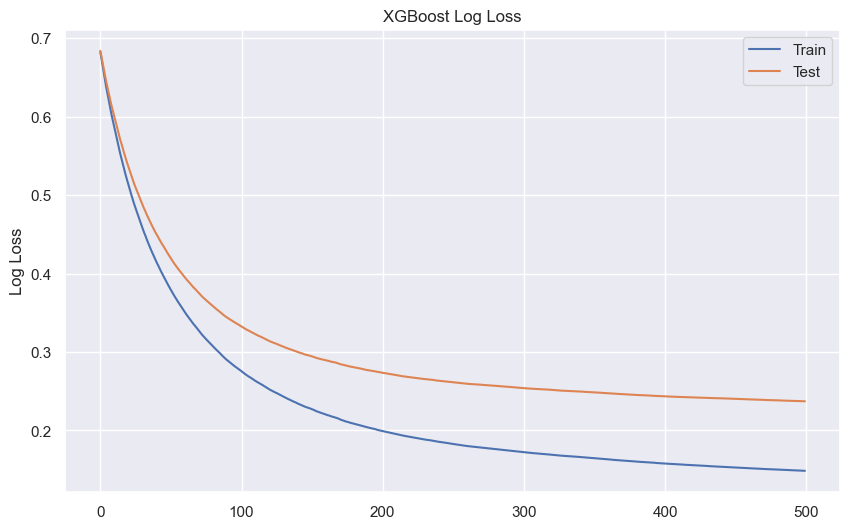

In [99]:


# Ploting the log loss evaluation metric
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['eval']['logloss'], label='Test')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


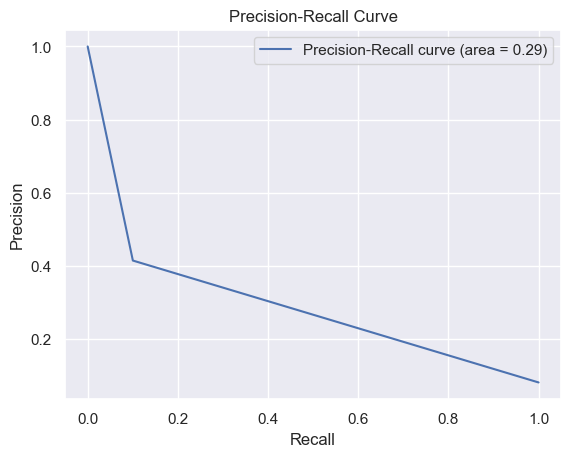

In [42]:
from sklearn.metrics import  precision_recall_curve, auc


# Calculating precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(ytest, preds)

# Calculating the area under the curve
pr_auc = auc(recall, precision)

# Plotting the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

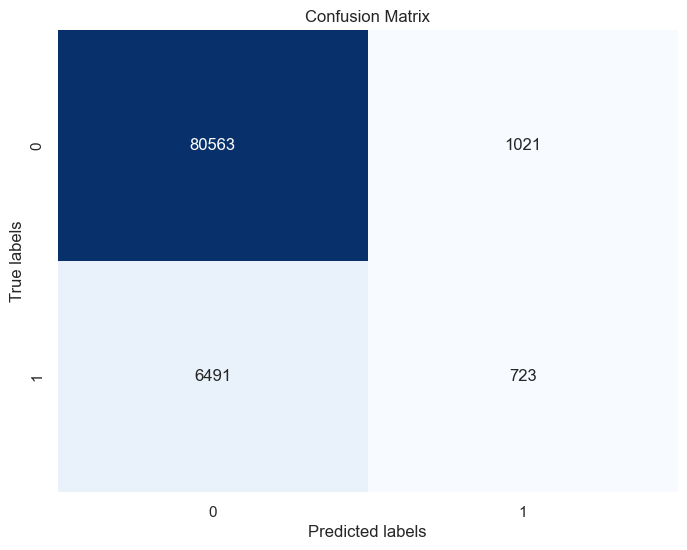

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, preds)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




In [43]:
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam

In [44]:

import tensorflow as tf
# Convert the datasets to TensorFlow tensors
#X_train = tf.convert_to_tensor(Xtrain, dtype=tf.float32)
#X_test = tf.convert_to_tensor(Xtest, dtype=tf.float32)
#y_train = tf.convert_to_tensor(ytrain, dtype=tf.float32)
#y_test = tf.convert_to_tensor(ytest, dtype=tf.float32)

# Now you can use these tensors in your TensorFlow model

Epoch 1/10


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12235/12235 ━━━━━━━━━━━━━━━━━━━━ 10s 738us/step - accuracy: 0.8147 - loss: 0.4099 - precision: 0.8428 - recall: 0.6191 - val_accuracy: 0.8023 - val_loss: 0.3003 - val_precision: 1.0000 - val_recall: 0.8023
Epoch 2/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 735us/step - accuracy: 0.8668 - loss: 0.3143 - precision: 0.9219 - recall: 0.7055 - val_accuracy: 0.8047 - val_loss: 0.2975 - val_precision: 1.0000 - val_recall: 0.8047
Epoch 3/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 726us/step - accuracy: 0.8742 - loss: 0.3001 - precision: 0.9266 - recall: 0.7212 - val_accuracy: 0.8349 - val_loss: 0.2636 - val_precision: 1.0000 - val_recall: 0.8349
Epoch 4/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 719us/step - accuracy: 0.8776 - loss: 0.2930 - precision: 0.9313 - recall: 0.7270 - val_accuracy: 0.8227 - val_loss: 0.2659 - val_precision: 1.0000 - val_recall: 0.8227
Epoch 5/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 720us/step - accuracy: 0.8797 - loss: 0.2894 - precision: 0.9316 - recall: 0.7334 - val_accuracy: 0

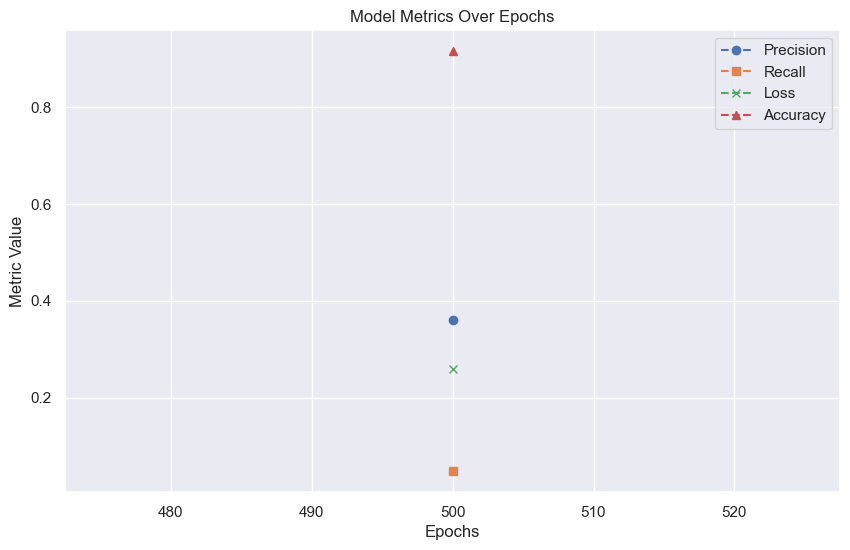

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step
DNN ROC AUC: 0.7810210853925108


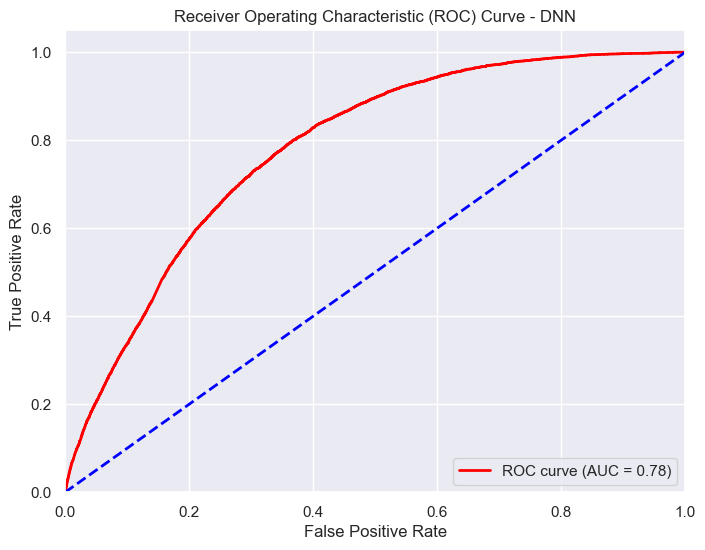

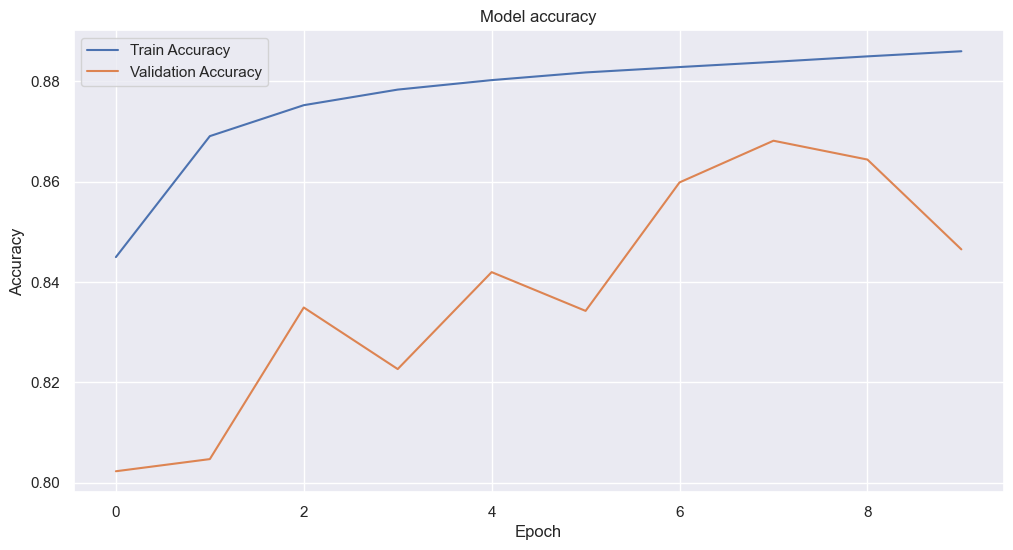

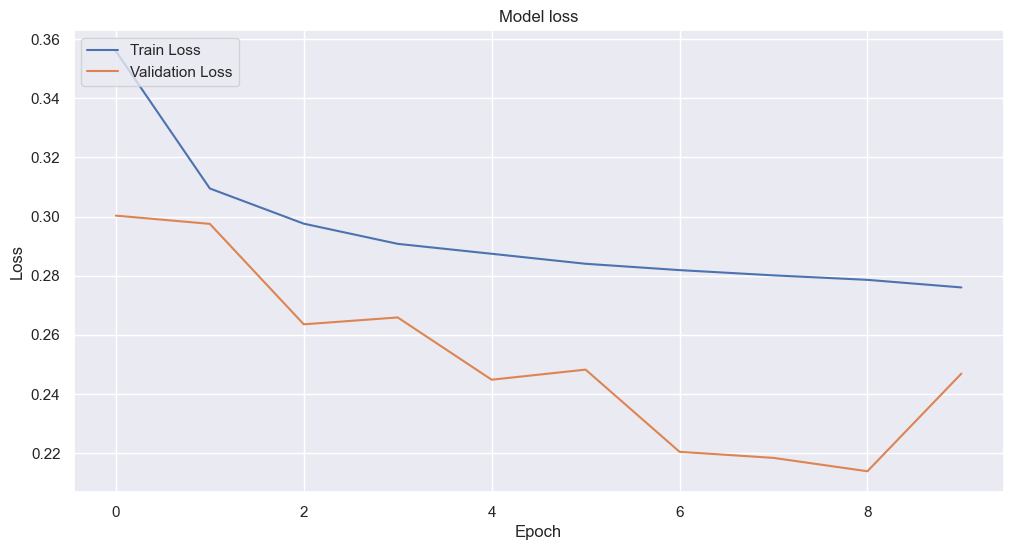

In [53]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)
# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compiling the model
#model.compile((optimizer=sgd), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision', 'recall'])
# Traininging the model
history = model.fit(X_train, ytrain, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))





# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [54]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
Precision: 0.8576695956446408
Recall: 0.918669339399536
F1 Score: 0.879858105803751


Epoch 1/25


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


12235/12235 ━━━━━━━━━━━━━━━━━━━━ 10s 759us/step - accuracy: 0.8143 - loss: 0.4132 - precision: 0.8448 - recall: 0.6189 - val_accuracy: 0.7871 - val_loss: 0.3152 - val_precision: 1.0000 - val_recall: 0.7871
Epoch 2/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 737us/step - accuracy: 0.8631 - loss: 0.3171 - precision: 0.9237 - recall: 0.6921 - val_accuracy: 0.8210 - val_loss: 0.2832 - val_precision: 1.0000 - val_recall: 0.8210
Epoch 3/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 745us/step - accuracy: 0.8691 - loss: 0.3080 - precision: 0.9214 - recall: 0.7127 - val_accuracy: 0.8322 - val_loss: 0.2687 - val_precision: 1.0000 - val_recall: 0.8322
Epoch 4/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 727us/step - accuracy: 0.8719 - loss: 0.3026 - precision: 0.9215 - recall: 0.7204 - val_accuracy: 0.7979 - val_loss: 0.3080 - val_precision: 1.0000 - val_recall: 0.7979
Epoch 5/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 9s 723us/step - accuracy: 0.8736 - loss: 0.2983 - precision: 0.9222 - recall: 0.7243 - val_accuracy: 0

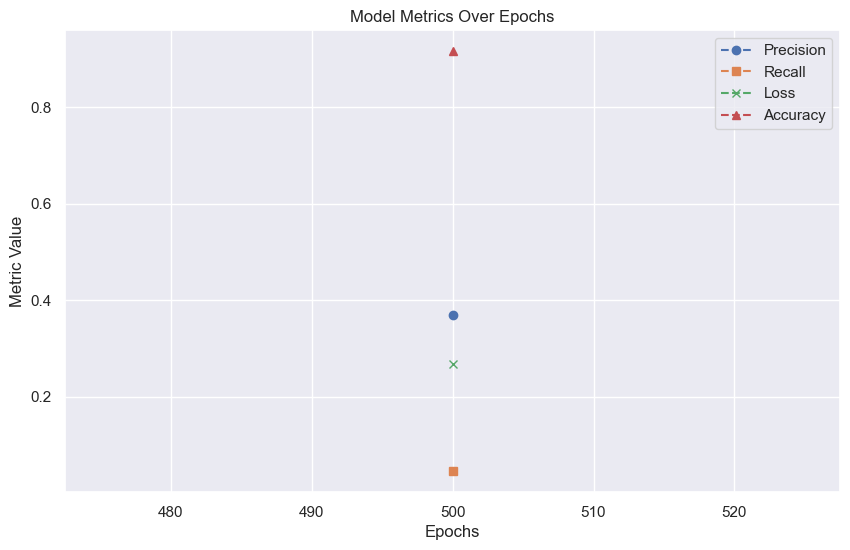

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step
DNN ROC AUC: 0.7639294446056248


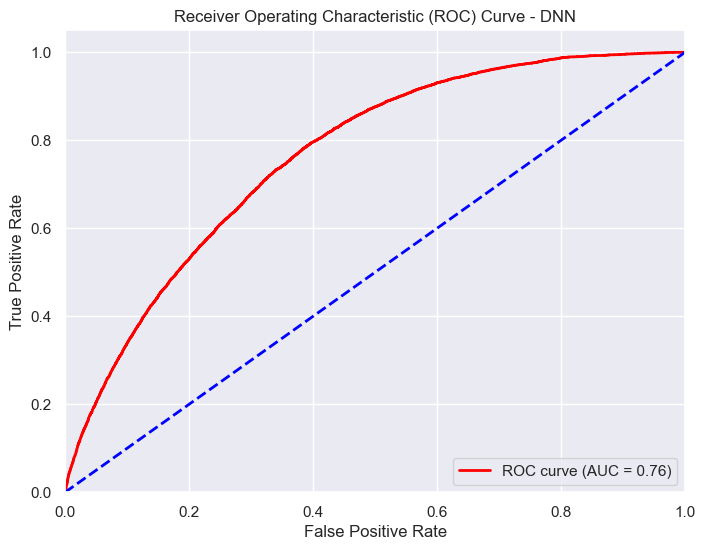

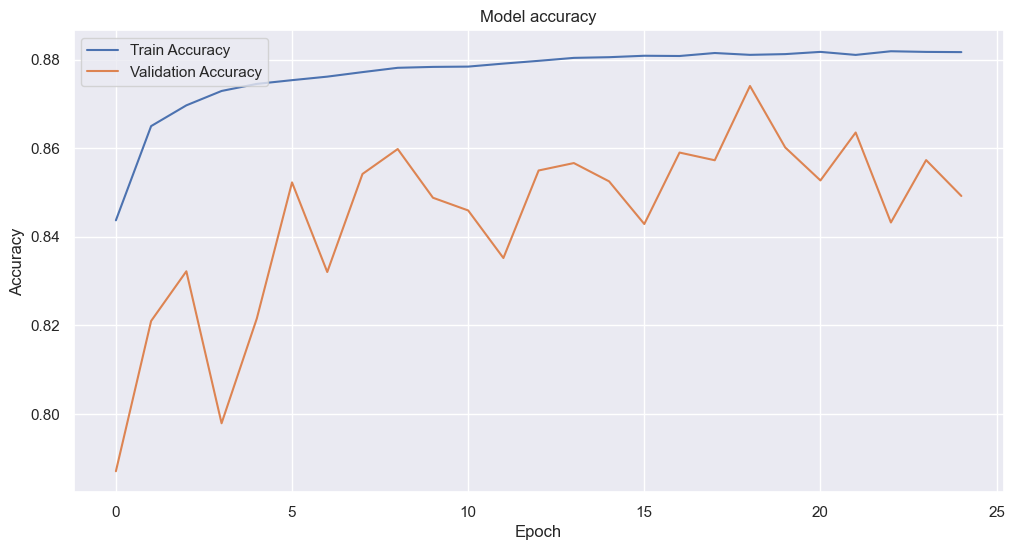

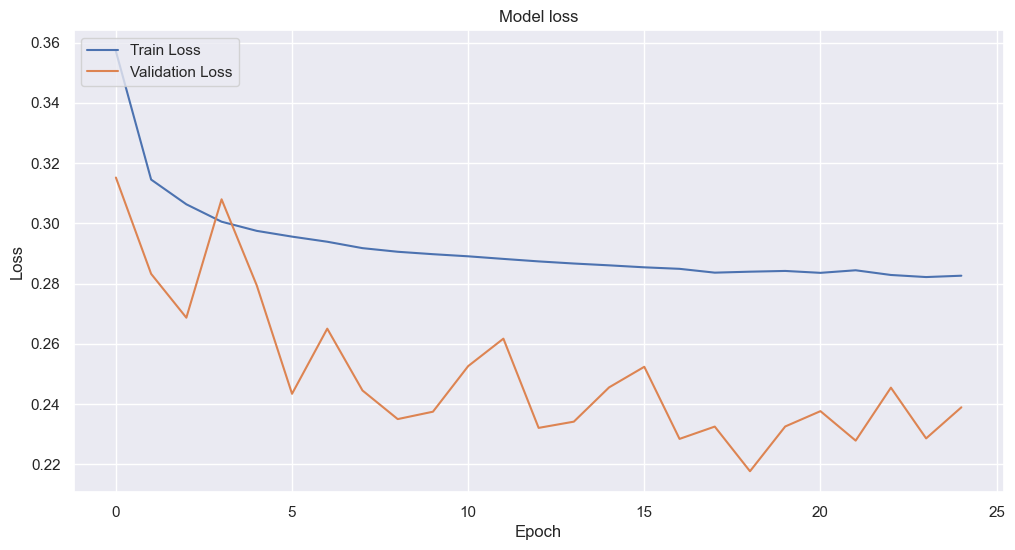

In [56]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

# Build the neural network model with Leaky ReLU activation
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification



# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Traininging the model
history = model.fit(X_train, ytrain, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))

# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [57]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step
Precision: 0.844118893004616
Recall: 0.9187594315187279
F1 Score: 0.8798590163400347


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8469 - loss: 0.3498 - precision: 0.9090 - recall: 0.6520 - val_accuracy: 0.8672 - val_loss: 0.1971 - val_precision: 1.0000 - val_recall: 0.8672
Epoch 2/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8985 - loss: 0.2528 - precision: 0.9504 - recall: 0.7698 - val_accuracy: 0.9050 - val_loss: 0.1621 - val_precision: 1.0000 - val_recall: 0.9050
Epoch 3/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9053 - loss: 0.2374 - precision: 0.9560 - recall: 0.7830 - val_accuracy: 0.8924 - val_loss: 0.1708 - val_precision: 1.0000 - val_recall: 0.8924
Epoch 4/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9081 - loss: 0.2302 - precision: 0.9610 - recall: 0.7872 - val_accuracy: 0.9106 - val_loss: 0.1473 - val_precision: 1.0000 - val_recall: 0.9106
Epoch 5/25
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9109 - loss: 0.2246 - precision: 0.9623 - recall: 0.7932 - val_accura

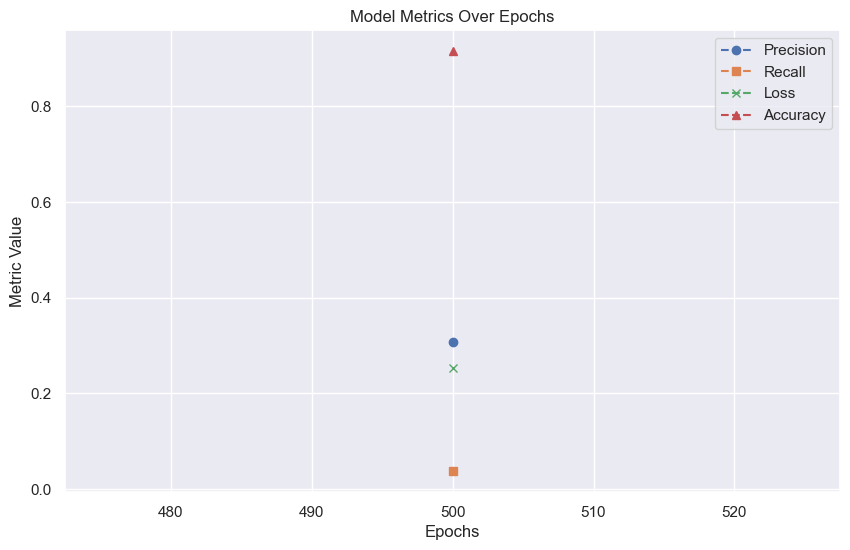

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step
DNN ROC AUC: 0.7934638559760435


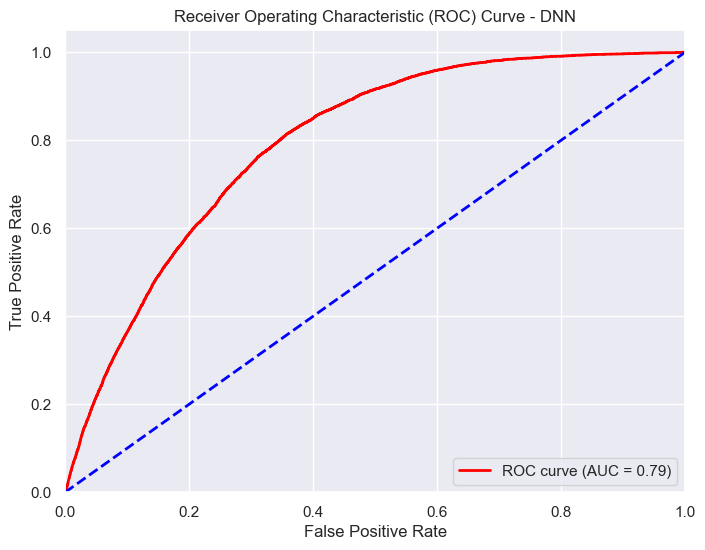

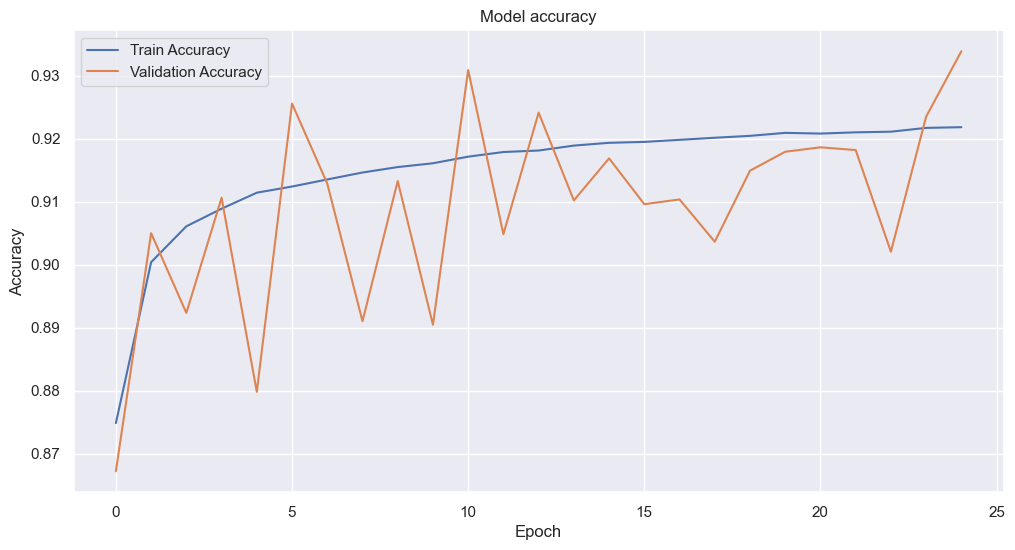

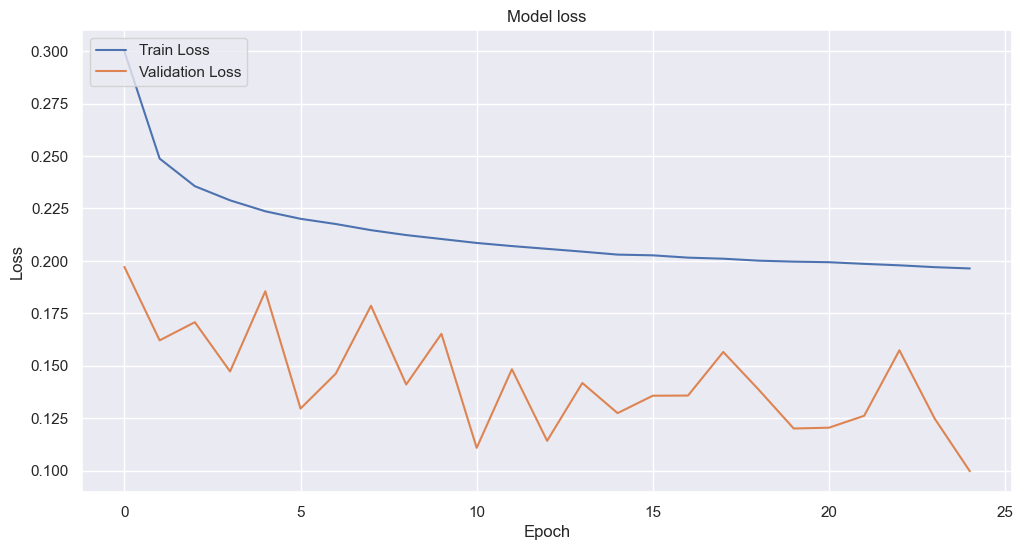

In [58]:
# Building the neural network model with Parametric ReLU activation
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))



# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Traininging the model
history = model.fit(X_train, ytrain, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
#print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
#print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))

# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [59]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step
Precision: 0.8659437727353759
Recall: 0.8656726502849164
F1 Score: 0.8658081090757842


In [60]:
from tensorflow.keras.activations import gelu


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8496 - loss: 0.3491 - precision: 0.8951 - recall: 0.6711 - val_accuracy: 0.8693 - val_loss: 0.2221 - val_precision: 1.0000 - val_recall: 0.8693
Epoch 2/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 12s 960us/step - accuracy: 0.8980 - loss: 0.2589 - precision: 0.9558 - recall: 0.7632 - val_accuracy: 0.8884 - val_loss: 0.1814 - val_precision: 1.0000 - val_recall: 0.8884
Epoch 3/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 12s 942us/step - accuracy: 0.9038 - loss: 0.2437 - precision: 0.9614 - recall: 0.7737 - val_accuracy: 0.9114 - val_loss: 0.1650 - val_precision: 1.0000 - val_recall: 0.9114
Epoch 4/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 12s 957us/step - accuracy: 0.9069 - loss: 0.2361 - precision: 0.9626 - recall: 0.7821 - val_accuracy: 0.9112 - val_loss: 0.1509 - val_precision: 1.0000 - val_recall: 0.9112
Epoch 5/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 12s 983us/step - accuracy: 0.9089 - loss: 0.2279 - precision: 0.9655 - recall: 0.7855 - va

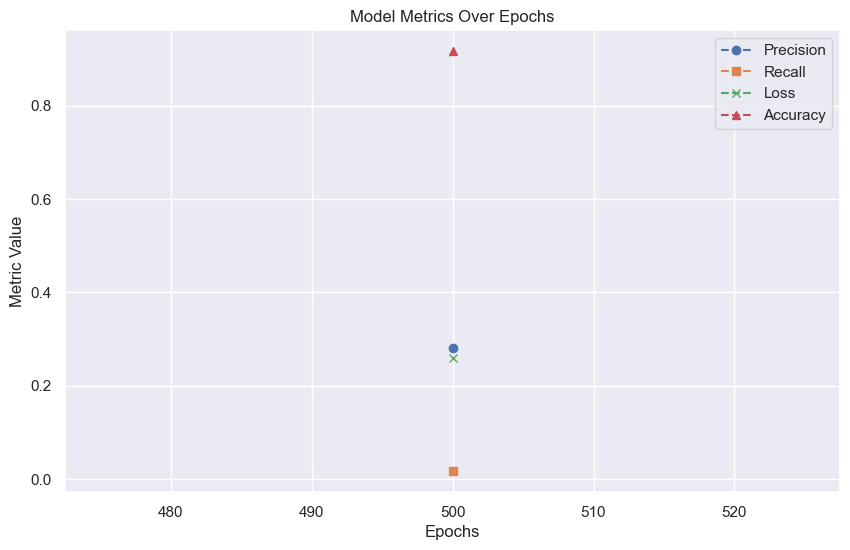

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step
DNN ROC AUC: 0.7913403967604449


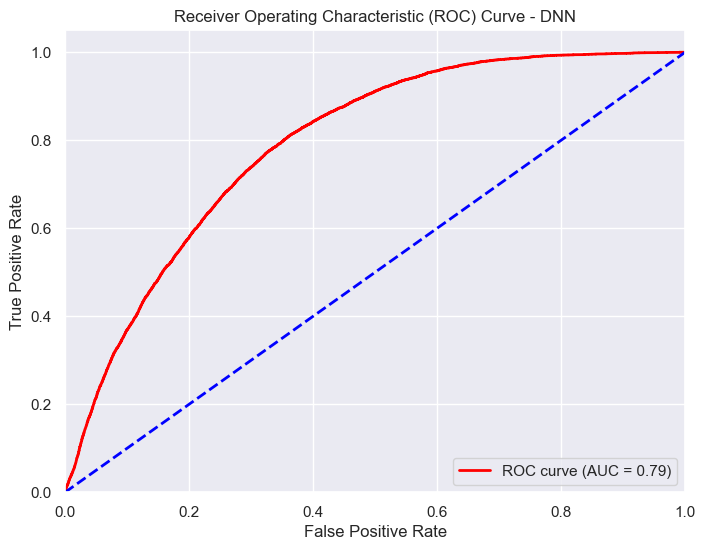

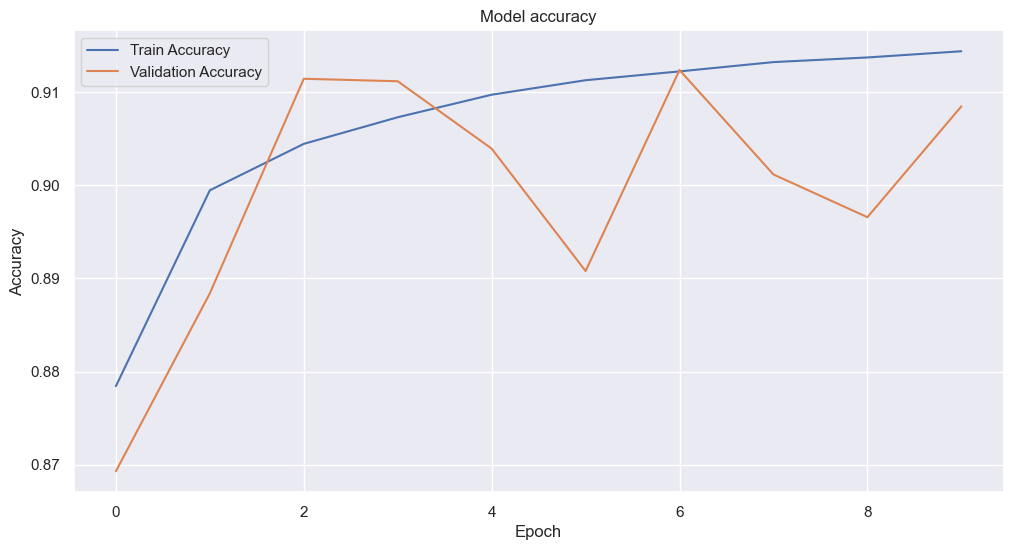

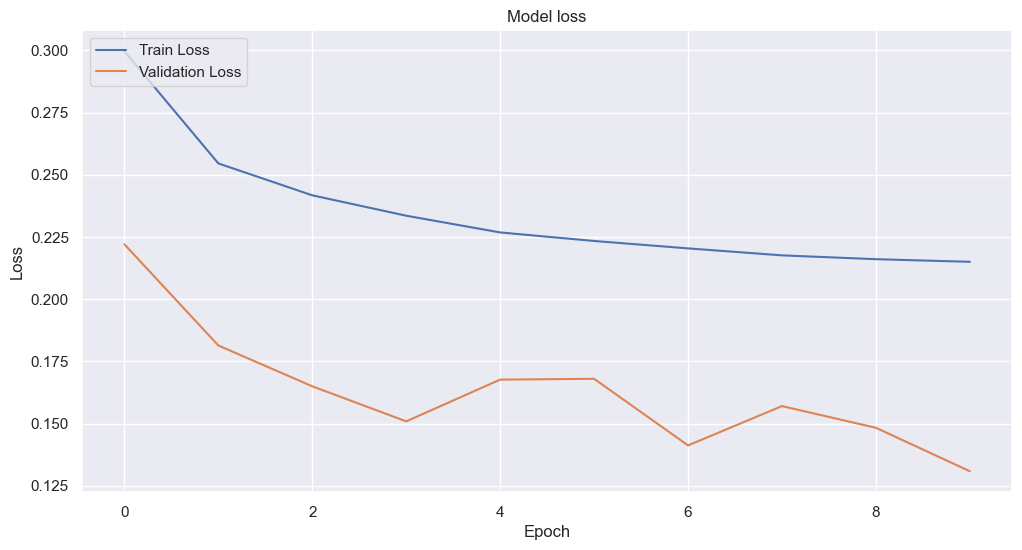

In [61]:
# Building the neural network model with GELU activation
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation=gelu))  # GELU activation directly applied here
model.add(Dropout(0))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0.4))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0.5))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification


# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Traininging the model
history = model.fit(X_train, ytrain, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
#print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))

# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [62]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step
Precision: 0.8565590652389369
Recall: 0.9152120543255479
F1 Score: 0.8794737778524785


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.8632 - loss: 0.3158 - precision: 0.9150 - recall: 0.6951 - val_accuracy: 0.8575 - val_loss: 0.2456 - val_precision: 1.0000 - val_recall: 0.8575
Epoch 2/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9020 - loss: 0.2462 - precision: 0.9544 - recall: 0.7746 - val_accuracy: 0.8892 - val_loss: 0.1804 - val_precision: 1.0000 - val_recall: 0.8892
Epoch 3/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9087 - loss: 0.2303 - precision: 0.9592 - recall: 0.7904 - val_accuracy: 0.9056 - val_loss: 0.1500 - val_precision: 1.0000 - val_recall: 0.9056
Epoch 4/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9108 - loss: 0.2235 - precision: 0.9613 - recall: 0.7941 - val_accuracy: 0.9277 - val_loss: 0.1190 - val_precision: 1.0000 - val_recall: 0.9277
Epoch 5/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9128 - loss: 0.2176 - precision: 0.9654 - recall: 0.7958 - val_accura

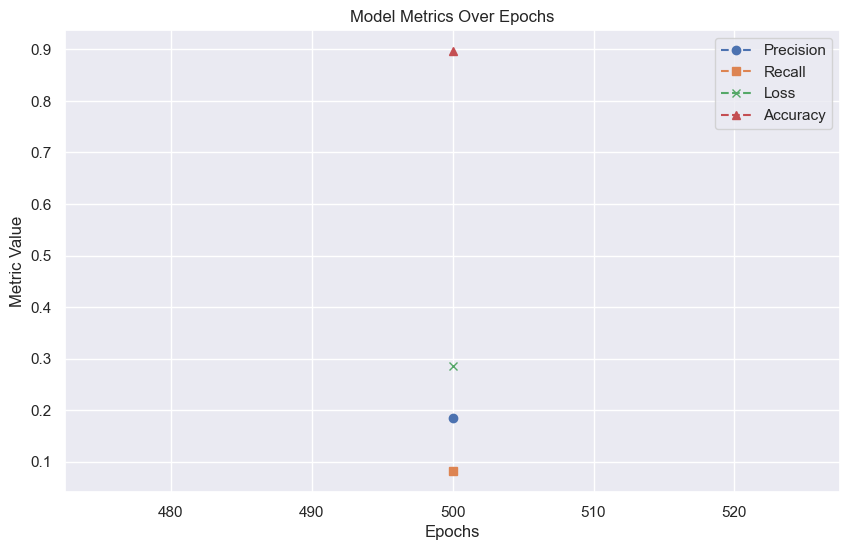

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 2s 591us/step
DNN ROC AUC: 0.7753148569401535


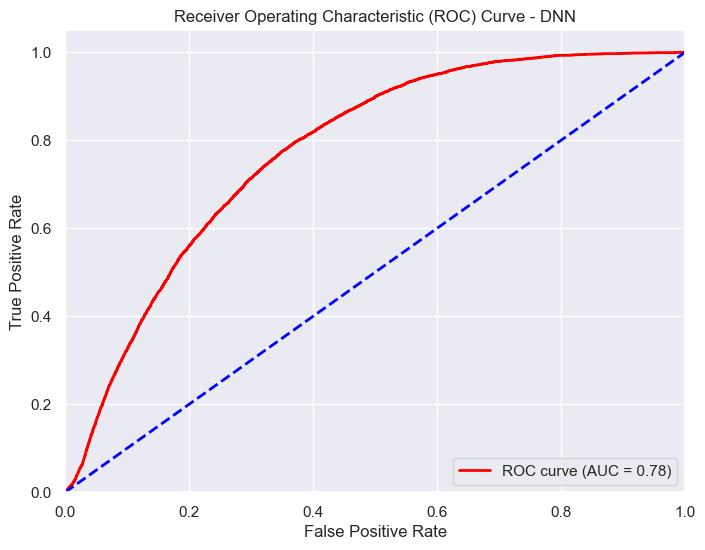

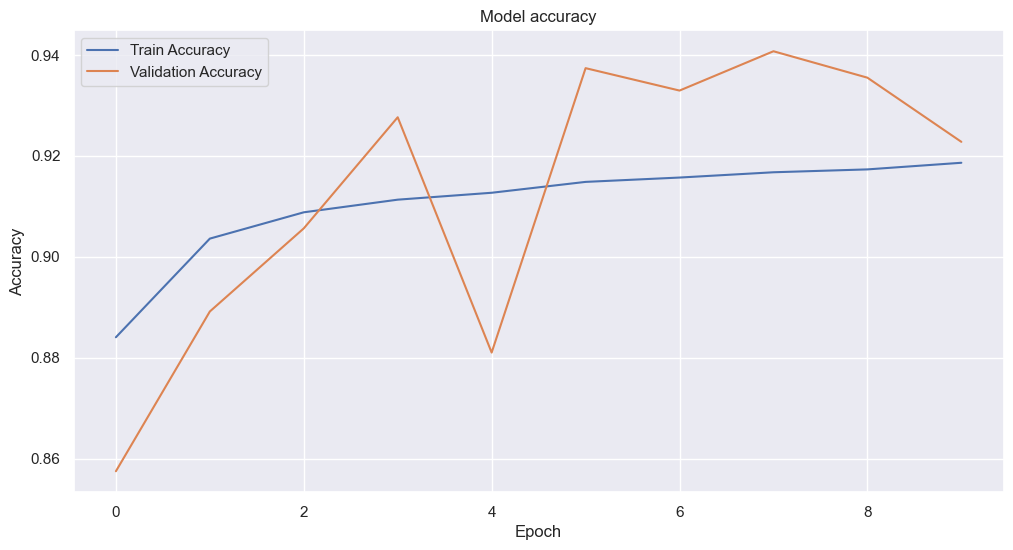

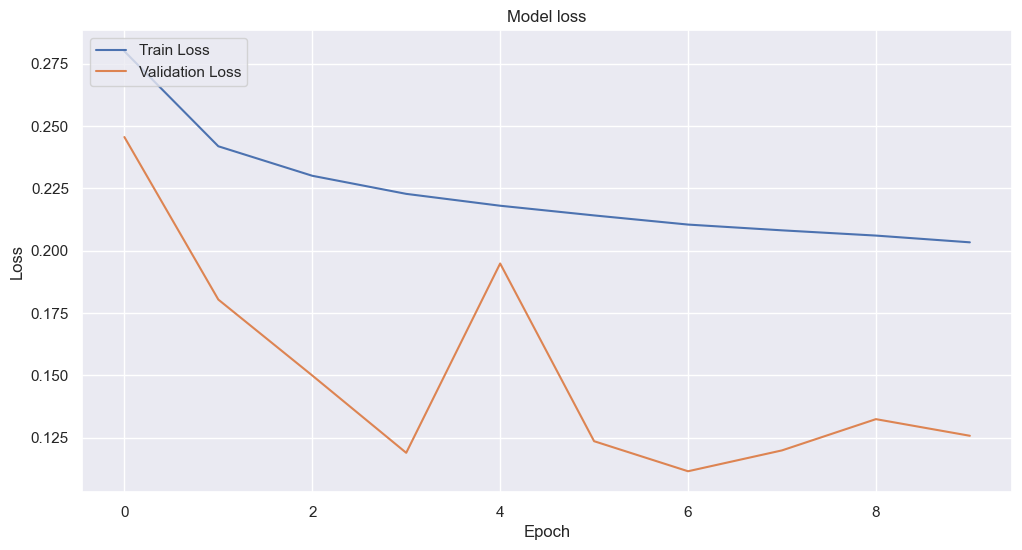

In [63]:
# Building the neural network model with Parametric ReLU activation
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(PReLU())
model.add(Dropout(0.0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))

model.add(Dense(1, activation='sigmoid'))





# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Traininging the model
history = model.fit(X_train, ytrain, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
#print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))

# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [64]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 2s 584us/step
Precision: 0.844118893004616
Recall: 0.9187594315187279
F1 Score: 0.8798590163400347


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\dhill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 13s 953us/step - accuracy: 0.8688 - loss: 0.3082 - precision: 0.9172 - recall: 0.7125 - val_accuracy: 0.8683 - val_loss: 0.2280 - val_precision: 1.0000 - val_recall: 0.8683
Epoch 2/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 11s 914us/step - accuracy: 0.9035 - loss: 0.2398 - precision: 0.9575 - recall: 0.7768 - val_accuracy: 0.8988 - val_loss: 0.1860 - val_precision: 1.0000 - val_recall: 0.8988
Epoch 3/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 11s 883us/step - accuracy: 0.9085 - loss: 0.2284 - precision: 0.9590 - recall: 0.7890 - val_accuracy: 0.8851 - val_loss: 0.1765 - val_precision: 1.0000 - val_recall: 0.8851
Epoch 4/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 11s 871us/step - accuracy: 0.9120 - loss: 0.2191 - precision: 0.9614 - recall: 0.7980 - val_accuracy: 0.9015 - val_loss: 0.1610 - val_precision: 1.0000 - val_recall: 0.9015
Epoch 5/10
12235/12235 ━━━━━━━━━━━━━━━━━━━━ 11s 867us/step - accuracy: 0.9151 - loss: 0.2121 - precision: 0.9640 - recall: 0.8035 - 

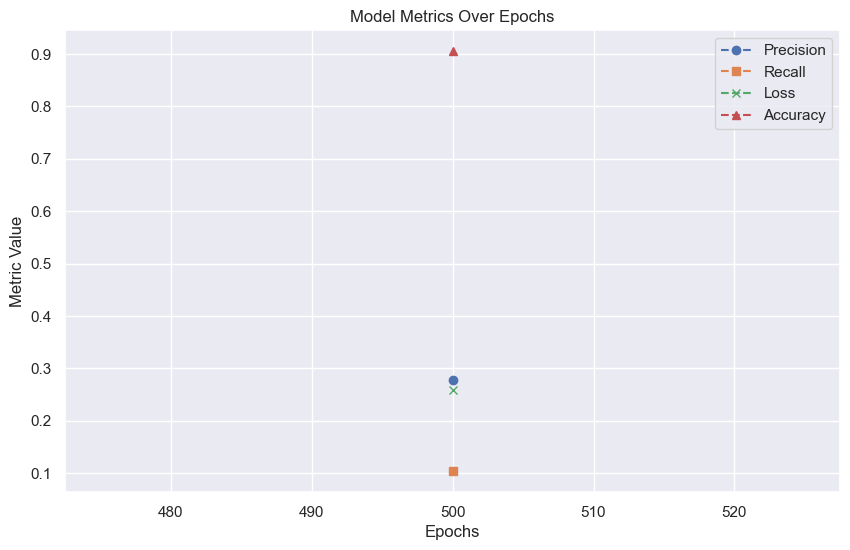

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step
DNN ROC AUC: 0.7878384842809896


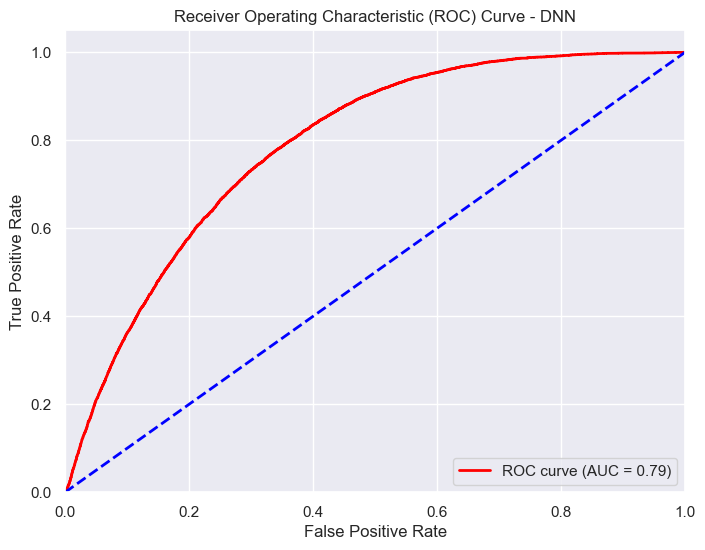

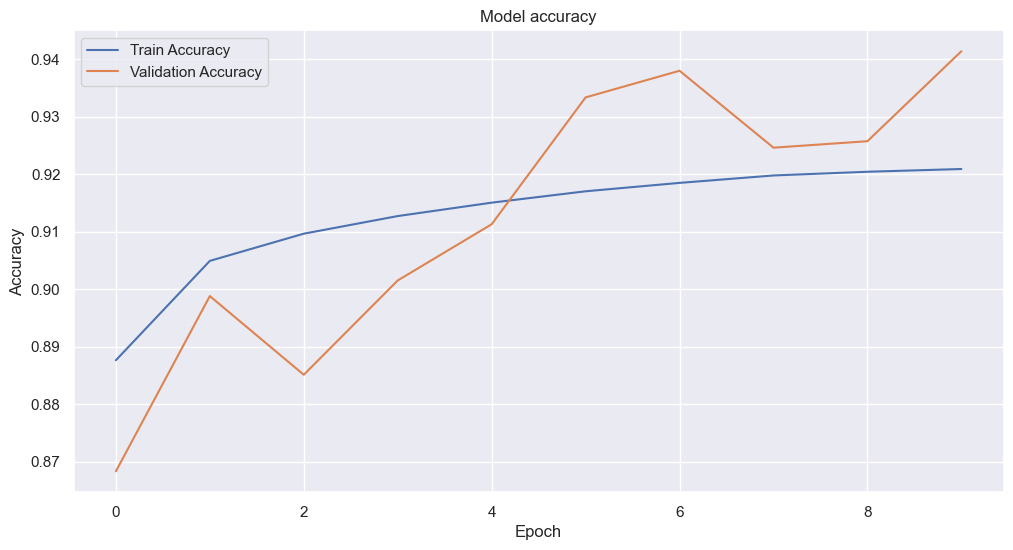

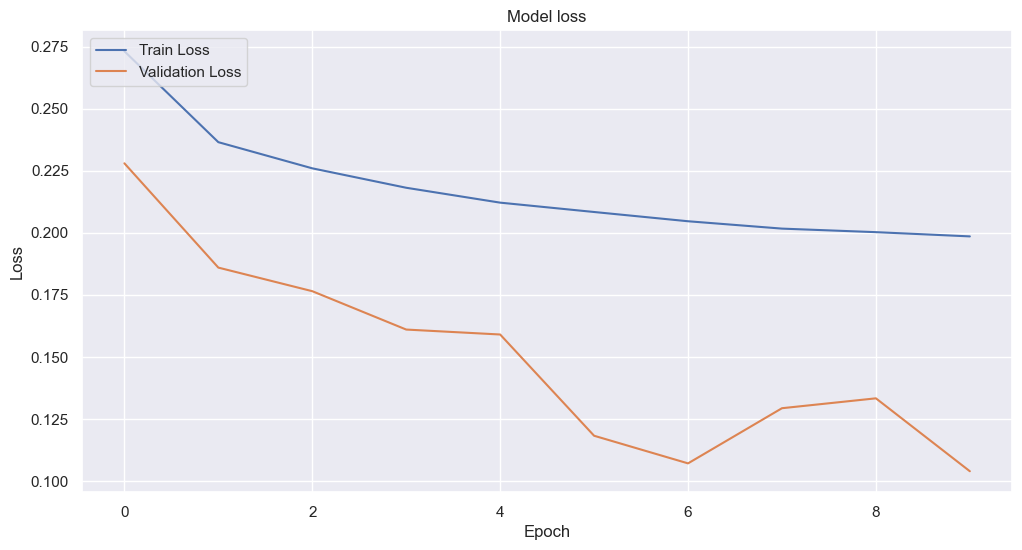

In [65]:
# Building the neural network model with Parametric ReLU activation..
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(PReLU())
model.add(Dropout(0.0))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(32, activation=gelu))
model.add(Dropout(0))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))





# Compiling the model..
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Traininging the model..
history = model.fit(X_train, ytrain, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model..
loss,accuracy, precision,recall = model.evaluate(X_test, ytest, verbose=0)
print(f'Precision: {precision:.4f}')
print(f'accuracy: {accuracy:.4f}')
#print(f'recall: {recall:.4f}')
#print(f'F1_score: {f1_score:.4f}')
# Creating a single plot
plt.figure(figsize=(10, 6))

# Precision
plt.plot(epochs, precision, label='Precision', marker='o', linestyle='--')

# Recall
plt.plot(epochs, recall, label='Recall', marker='s', linestyle='--')

# Loss
plt.plot(epochs, loss, label='Loss', marker='x', linestyle='--')

# Accuracy
plt.plot(epochs, accuracy, label='Accuracy', marker='^', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

dnn_prob = model.predict(X_test)[:, 0]
dnn_roc_auc = roc_auc_score(ytest, dnn_prob)
print("DNN ROC AUC:", dnn_roc_auc)


fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(ytest, dnn_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(dnn_roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DNN')
plt.legend(loc="lower right")
plt.show()




# Ploting training & validation accuracy values ReLU

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [66]:
# checking precision , recall and f1.......

preds = model.predict(Xtest)
threshold =0.5
preds = np.where(preds > threshold, 1, 0)

precision = precision_score(ytest, preds, average='weighted')
recall = recall_score(ytest, preds,average='weighted')
f1 = f1_score(ytest, preds, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step
Precision: 0.8528909681409861
Recall: 0.916529651568729
F1 Score: 0.8793197252788507


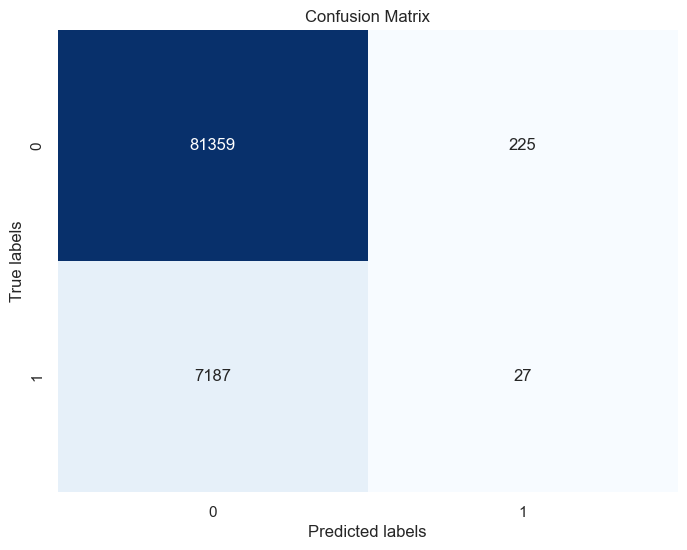

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, preds)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




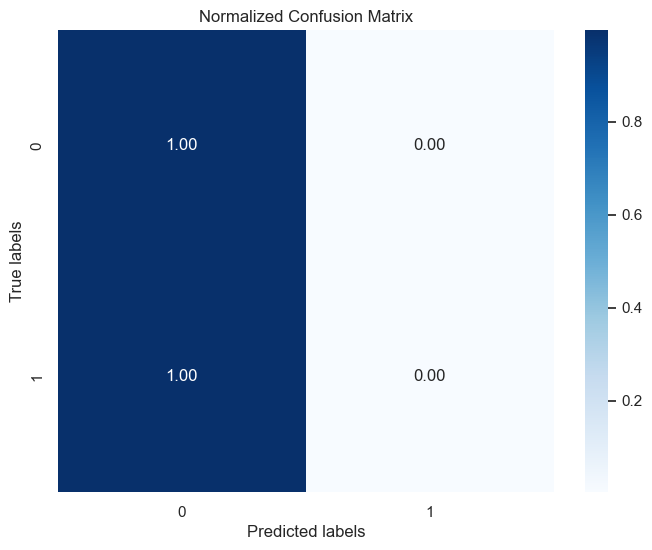

In [68]:
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True)

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [306]:
# Result and Conclusion...
# after applying different models with different variations we have come to the Following Conclusion:
#       XGboost have performed well on different metrics as follow:
#                                                                             Accuracy: 0.918872
#                                                                             precision: 0.901001
#                                                                                
#
# Among the DNN models with different activation functions models performing well were:
#                                                               DDN(activation='PReLU') with extended depth:   
#                                                                                                 Precision: 0.8544
#                                                                                                 accuracy: 0.91655
#
#                                                               DNN(PReLU and gelu combined):
#                                                                                          Precision: 0.8513
#                                                                                          accuracy: 0.9094